Hierarchical Clustering algoritmasını uygulayalım.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("segmentation_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
data.drop(["ID","Occupation","Education","Settlement size","Marital status","Sex"],axis=1,inplace=True)

In [6]:
data.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


In [7]:
x = data.Age.values

y = data.Income.values

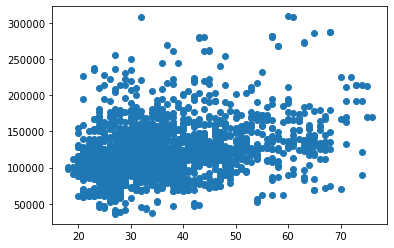

In [8]:
plt.scatter(x,y)
plt.show()

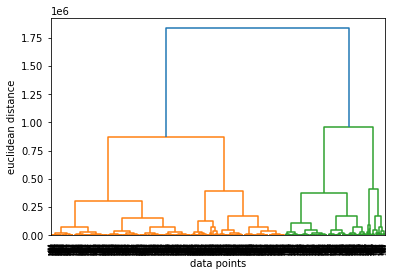

In [9]:
#dendogram

from scipy.cluster.hierarchy import linkage, dendrogram 

merg = linkage(data, method="ward") 

dendrogram(merg, leaf_rotation=90)

plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

Dendogram'da gördüğümüz üzere bir başka bar'ın kesmemesi şartı ile en uzun uzunluğa sahip olan bar mavidir. Mavi bar'dan threshold çizgisi çizildiğinde 2 noktayı kesmektedir. Dolayısıyla en uygun cluster sayısı 2'dir.

In [10]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "ward")

clusters = hc.fit_predict(data)

In [11]:
data["label"] = clusters

In [12]:
data

,Age,Income,label
0,67,124670,1
1,22,150773,0
2,49,89210,1
3,45,171565,0
4,53,149031,0
...,...,...,...
1995,47,123525,1
1996,27,117744,1
1997,31,86400,1
1998,24,97968,1


In [13]:
data.label.unique()

array([1, 0], dtype=int64)

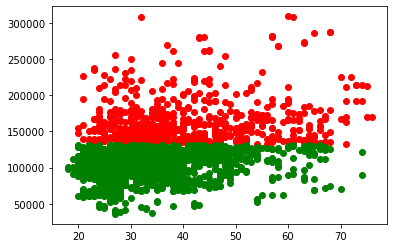

In [14]:
plt.scatter(data.Age[data.label==0], data.Income[data.label==0], color="red")
plt.scatter(data.Age[data.label==1], data.Income[data.label==1], color="green")
plt.show()